In [ ]:
목적 : 호주 당뇨병 치료약 월별 Sales 데이터를 사용하여 시계열로 데이터 분석하여 유의미한 인사이트 도출
결론 : 데이터를 trend, seasonal, residual로 나타낸 결과, 2006년과 2007년에 Cycle에서 벗어나는 경향을 보였다. 
    특히, 2007년 residual 큰 것을 확인할 수 있었다.  In[20]을 살펴보면 2001년부터 Trend 는 점차 증가하는 추세를 보이고 있다. 
    

In [4]:
#시계열 데이터 분석으로 위한 statsmodels 설치하기 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv' , parse_dates=['date'], index_col='date')
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


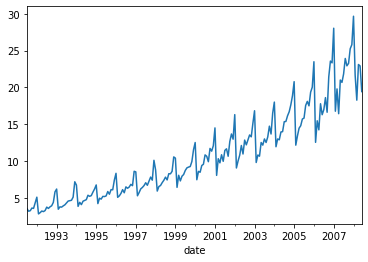

In [8]:
#년도별 값을 그래프로 나타내기
df.value.plot()

In [10]:
#2000이후 데이터만을 가져오기
df= df[df.index > '1999-12-31']
df.head()

,value
date,
2000-01-01,12.511462
2000-02-01,7.457199
2000-03-01,8.591191
2000-04-01,8.474000
2000-05-01,9.386803


In [14]:
#결과
result = seasonal_decompose(df, model='additive', two_sided = False)
 

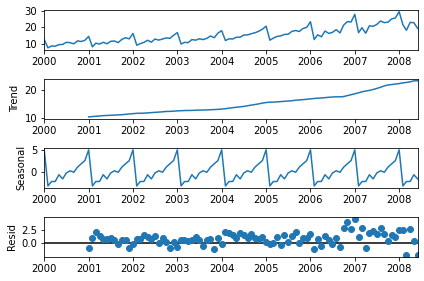

In [15]:
result.plot()
plt.show()

In [16]:
#concat으로 하나의 데이터로 

df_re = pd.concat([result.observed, result.trend, result.seasonal, result.resid], axis = 1)

In [17]:
df_re.columns=['obs', 'trend','seasonal', 'resid']
df_re.dropna(inplace = True)

In [18]:
df_re.head(24)
df_re['year'] = df_re.index.year

In [19]:
df_re.head()

,obs,trend,seasonal,resid,year
date,,,,,
2001-01-01,14.497581,10.290804,5.061367,-0.854590,2001
2001-02-01,8.049275,10.398229,-3.307973,0.959019,2001
2001-03-01,10.312891,10.494636,-2.293969,2.112225,2001
2001-04-01,9.753358,10.619680,-2.264396,1.398075,2001
2001-05-01,10.850382,10.733969,-0.711368,0.827781,2001


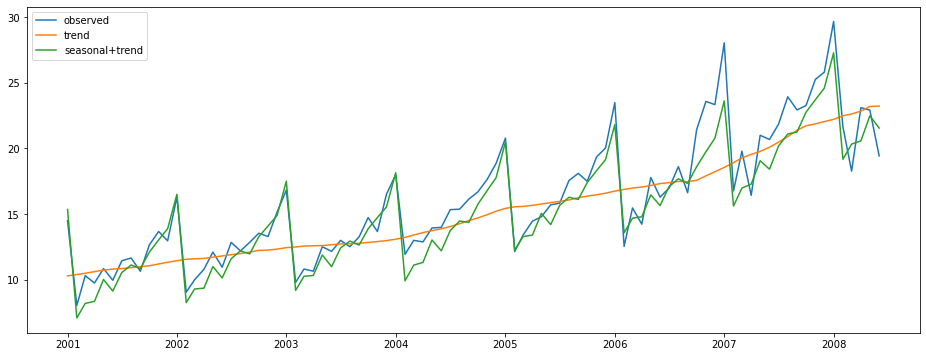

In [20]:
#그래프 

plt.figure(figsize =(16,6))
plt.plot(df_re.obs)
plt.plot(df_re.trend)
plt.plot(df_re.seasonal+df_re.trend)
plt.legend(['observed', 'trend', 'seasonal+trend'])
plt.show()

#2006년 2007년에는 ordinary한 cycle에서 벗어나는 경향이 있다. (즉, residual 크다.)

In [24]:
#날짜 데이터를 년/달로 표시하기 위해 함수사용

df_re.index[0]

def get_date(date):
    return(str(date.year)+ '-' + str(date.month))

In [25]:
get_date(df_re.index[0])

'2001-1'

[Text(0, 0, '2001-1'),
 Text(0, 0, '2001-2'),
 Text(0, 0, '2001-3'),
 Text(0, 0, '2001-4'),
 Text(0, 0, '2001-5'),
 Text(0, 0, '2001-6'),
 Text(0, 0, '2001-7'),
 Text(0, 0, '2001-8'),
 Text(0, 0, '2001-9'),
 Text(0, 0, '2001-10'),
 Text(0, 0, '2001-11'),
 Text(0, 0, '2001-12'),
 Text(0, 0, '2002-1'),
 Text(0, 0, '2002-2'),
 Text(0, 0, '2002-3'),
 Text(0, 0, '2002-4'),
 Text(0, 0, '2002-5'),
 Text(0, 0, '2002-6'),
 Text(0, 0, '2002-7'),
 Text(0, 0, '2002-8'),
 Text(0, 0, '2002-9'),
 Text(0, 0, '2002-10'),
 Text(0, 0, '2002-11'),
 Text(0, 0, '2002-12'),
 Text(0, 0, '2003-1'),
 Text(0, 0, '2003-2'),
 Text(0, 0, '2003-3'),
 Text(0, 0, '2003-4'),
 Text(0, 0, '2003-5'),
 Text(0, 0, '2003-6'),
 Text(0, 0, '2003-7'),
 Text(0, 0, '2003-8'),
 Text(0, 0, '2003-9'),
 Text(0, 0, '2003-10'),
 Text(0, 0, '2003-11'),
 Text(0, 0, '2003-12'),
 Text(0, 0, '2004-1'),
 Text(0, 0, '2004-2'),
 Text(0, 0, '2004-3'),
 Text(0, 0, '2004-4'),
 Text(0, 0, '2004-5'),
 Text(0, 0, '2004-6'),
 Text(0, 0, '2004-7'),
 T

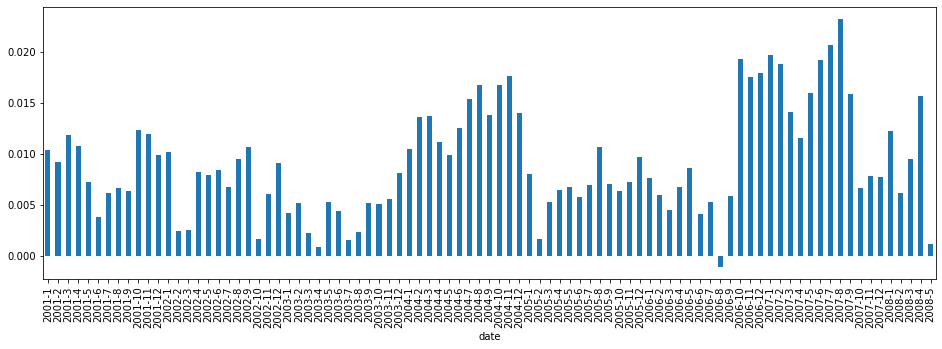

In [26]:
#데이터의 trend (월별 실질적인 증가율)
ax = df_re.trend.pct_change().dropna().plot(kind='bar', figsize = (16,5))
ax.set_xticklabels(list(map(lambda x: get_date(x), df_re.index)))

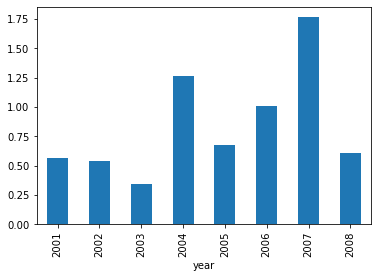

In [27]:
#residual : unexpected 값들

df_re.groupby('year')['resid'].mean().plot(kind='bar')

In [ ]:
즉, 2007년이 Cycle에서 가장 벗어나 있음을 확인가능했다. 
